# **1-Hierarchical clustering**

### is a way to automatically group (“cluster”) similar items together without telling the algorithm how many groups there should be.

### It works like the process of a Family-Tree creation but instead of linking people, Machine will link items that look or behave alike. (Similarities)

# ***So it is:***

### **Unsupervised learning:** You give the algorithm data (e.g., pictures of emojies or different shapes) and it finds structure on its own.

### **Clustering:** Putting “close” or “similar” things into the same bucket.

### **Hierarchical clustering:** builds a tree (called a dendrogram) showing how items join together step by step.

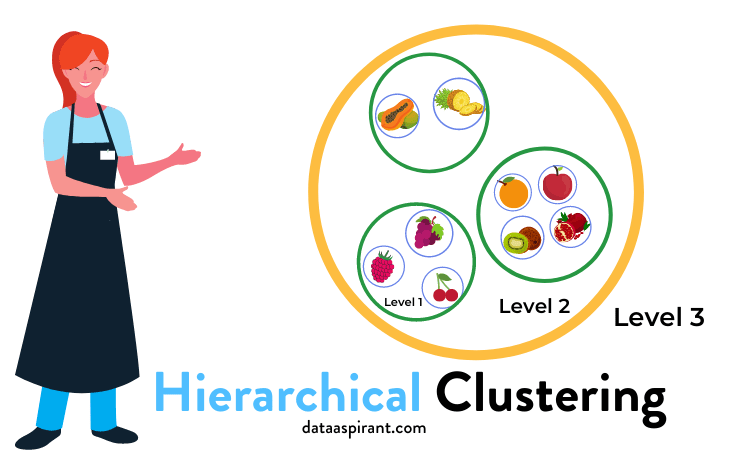

# **Two "Directions"**

## **1. Agglomerative (bottom-up)**

### - Start: each item is its own cluster.

### - Iteratively merge the two closest clusters into one larger cluster based on their proximity or similarity (Linkage Method).

### - Repeat until everything is in a single big cluster.



## **2. Divisive (top-down)**

### ***Agglomerative*** is far more common in practice.



---


# **How It Works:**

1. **Compute similarities**

Measure “distance” between every pair of items (e.g., Euclidean distance).

2. **Find the closest pair**

Merge them into a new cluster.

3. **Update distances**

*Decide how to measure distance between clusters. Common methods:*

* Single linkage (closest points)

* Complete linkage (farthest points)

* Average linkage (average distance)

4. **Repeat**

Keep merging the next-closest clusters.



---


# **Linkage Methods:**

## *Different linkage methods can be used to define the proximity or similarity between clusters. Some common linkage methods include:*


### **1. Single Linkage:** The distance between two clusters is defined as the shortest distance between any two points in the two clusters.

### **2. Complete Linkage:** The distance between two clusters is defined as the maximum distance between any two points in the two clusters.

### **3. Average Linkage:** The distance between two clusters is defined as the average distance between all pairs of points from the two clusters.

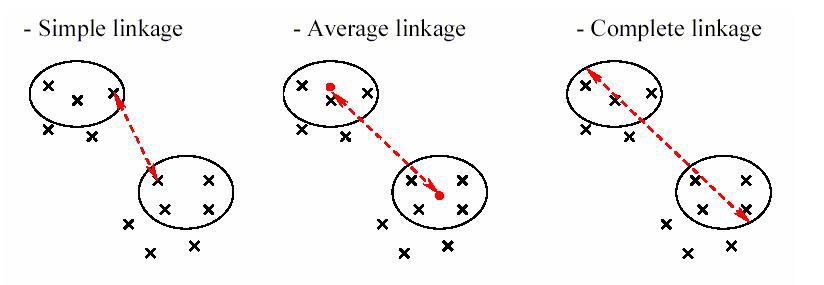



---


# **Pros**

###1. No need to pick a fixed number of clusters up front.

###2. Gives a full hierarchy, useful to see cluster relationships.

# **Cons**

###1. Computationally expensive for large datasets (pairwise distances grow quadratically).

###2. Sensitive to noisy data and the choice of linkage metric.





---


# **When We Use ?**

###1. When we want a multi-level view of how data groups together.

###2. For exploratory analysis to discover natural groupings.

###3. In domains like biology (e.g., gene expression clustering) or document organization.

In [1]:
! pip install scikit-learn   # using common Machine Learning Algorithms
! pip install Pandas         # Data Management
! pip install seaborn        # Statistical Visualization and integrated with pandas

In [2]:
import numpy as np                      # Computational operation
import pandas as pd                     # Data Management
from sklearn.datasets import load_iris  # this code is for importing the example data which is inside of the sklearn library
from sklearn.cluster import KMeans      # Importing K-Means clustering algorithm from scikit-learn module
import matplotlib.pyplot as plt         # Visualization

In [3]:
iris = load_iris()  # This is an example to download data from the library
iris.data           # this is an array of four features in this dataset
iris.data.shape

(150, 4)

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names) #Creation the dataframe with rows from the recordings of the dataset and their features as columns.
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


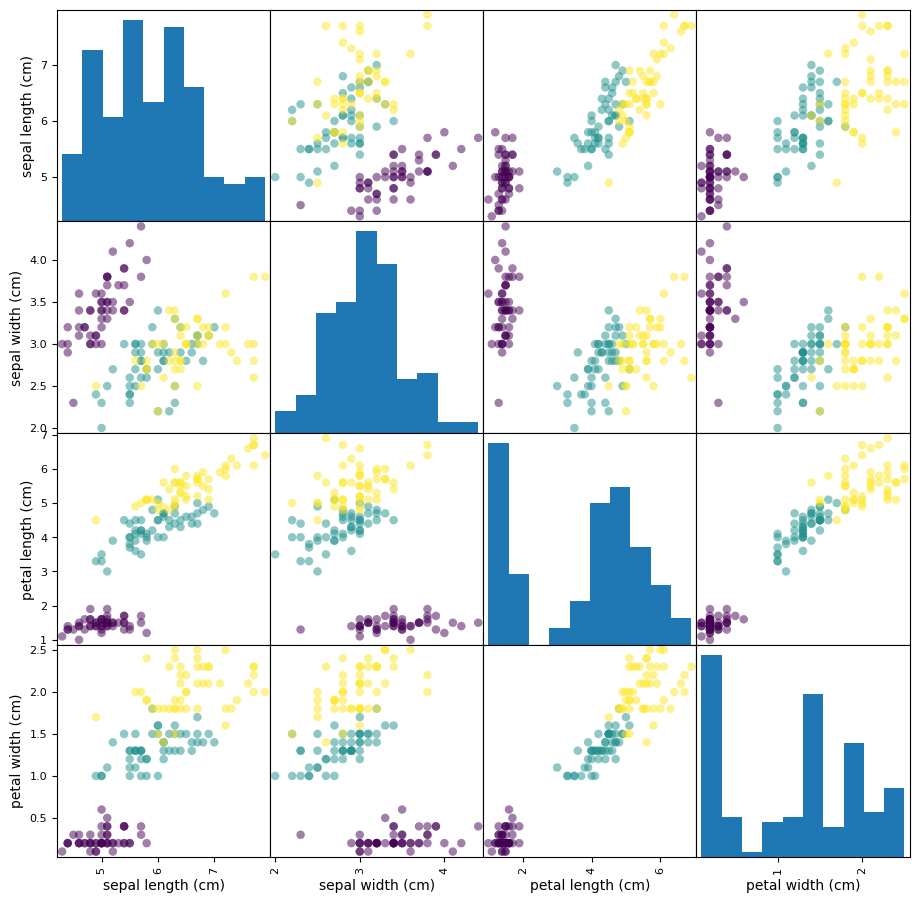

In [7]:
pd.plotting.scatter_matrix(df, c=iris.target, figsize=[11, 11], s=150)
plt.show()

In [8]:
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster  # importing the hierarchical clustering libraries
import matplotlib.pyplot as plt
hir = linkage(iris.data,method='complete') # using the "complete" linkage

**linkage**: This function is used for hierarchical clustering in the scipy.cluster.hierarchy module.

**iris.data:** This assumes that iris.data contains the feature data of the iris flowers.

**method**='complete': This specifies the linkage method to be used for hierarchical clustering. The 'complete' linkage method calculates the distance between two clusters as the maximum distance between any two points in the two clusters. It is one of the methods to determine the merging of clusters.

**hir**: This variable stores the result of the hierarchical clustering process. It will contain information about how clusters are merged and the distances between clusters.



---


 **Vertical axis** of the dendrogram conveys information about the dissimilarity or distance between clusters,

 **Horizontal axis** displays the individual data points or clusters being merged or split.

 The dendrogram provides a visual representation of the clustering process, helping you understand how data points are grouped based on their similarity or dissimilarity.

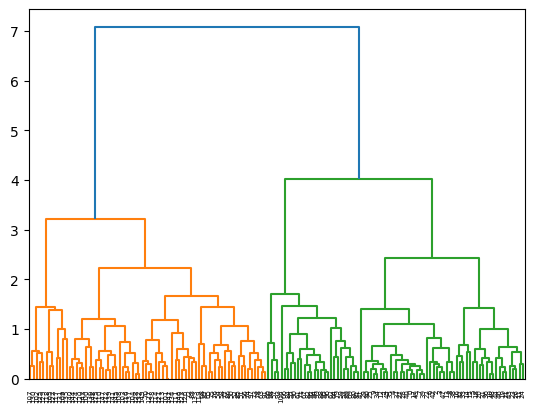

In [9]:
dendrogram(hir,leaf_rotation=90) # rotation, turns the sample labels vertical so they don’t overlap.
plt.show()



---


1. **fcluster** is a function from the scipy.cluster.hierarchy module used to extract clusters from a hierarchical clustering result.

2. **hir** is the result of the linkage function, which represents the hierarchical clustering of the data.

3. **4 (number)**: specifies the threshold distance for forming clusters. Clusters are formed in such a way that no two items in the same cluster have a distance greater than 4.

4. **criterion**='distance' indicates that the threshold distance criterion is being used to form clusters.

In [10]:
labels = fcluster(hir, 4, criterion='distance') # extracting the clusters based on the linkage values (distance), no 2 items in the same cluster do not have the distance more than 4
print(labels)


[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 2 1 2 1 1 1 2 2 2 1 2 2 2 2 2 1 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


### **Note:** `fcluster` assigns the first cluster the label 1, the next 2, and so on.

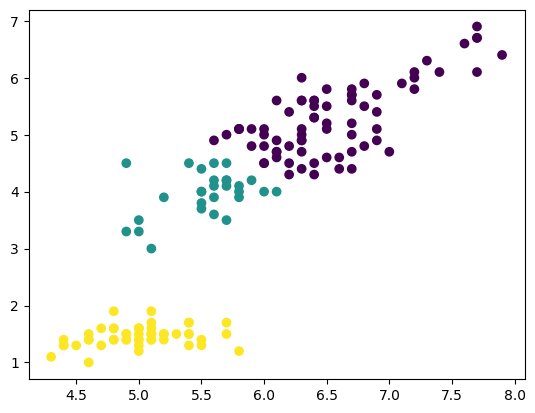

In [11]:
plt.scatter(iris.data[:,0], iris.data[:,2], c=labels) # Sepal Length as (x-axis), and Petal Length as (y-axis)
plt.show()



---


# **2- Mean-Shift Clustering**

## A non-parametric clustering algorithm (you don’t pick the number of clusters ahead of time).

## It treats your data as samples from an underlying density surface, then finds the “peaks” (modes) of that surface.



---

# Pros

1. Automatically finds the number of clusters.

2. It Can detect arbitrarily shaped clusters (not just spherical).

# Cons

1. Computationally heavy for large datasets (iterates over neighborhood searches).

2. Choice of bandwidth is crucial and often problem-specific.



---


# **How It Works ?**

## 1- We have a bunch of blue dots scattered on the plane (Single Data-points)

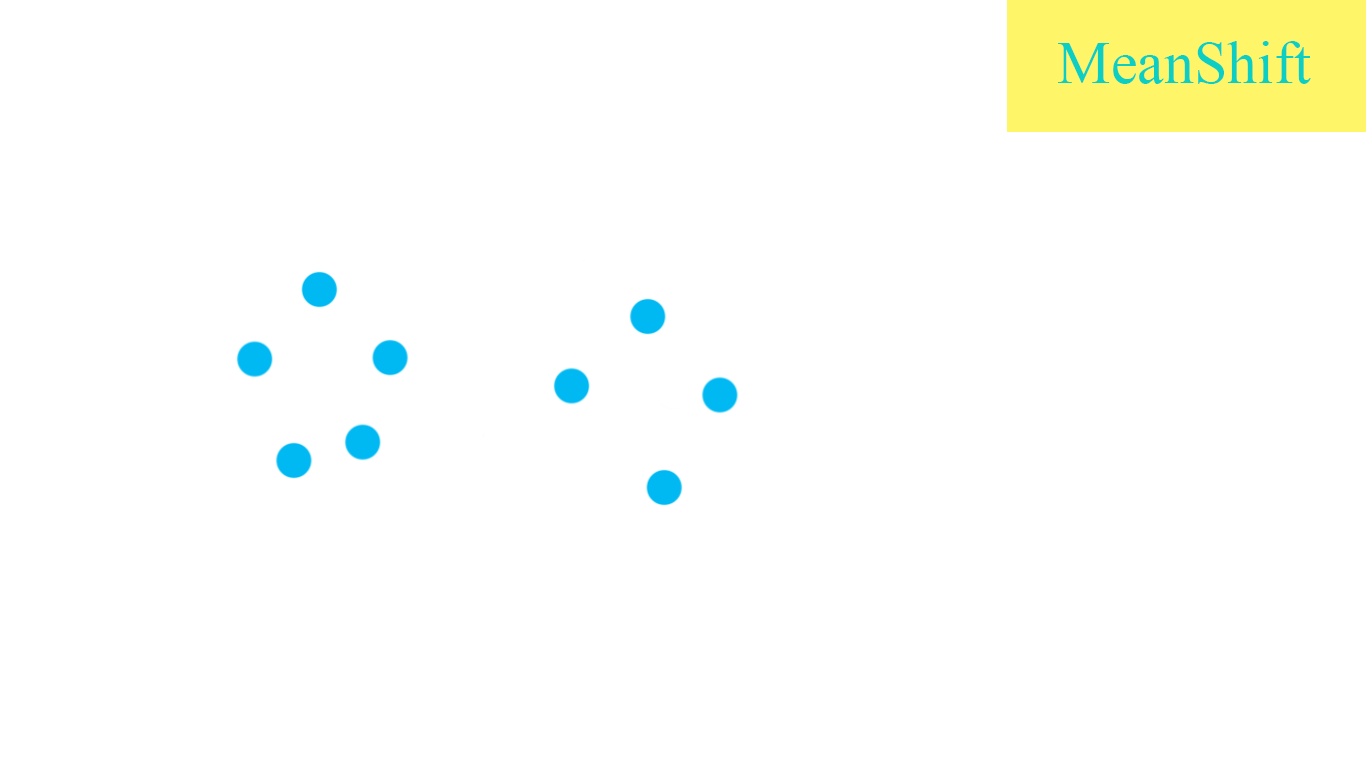

## 2- Place a window (often a Gaussian kernel) of a given bandwidth around each point.

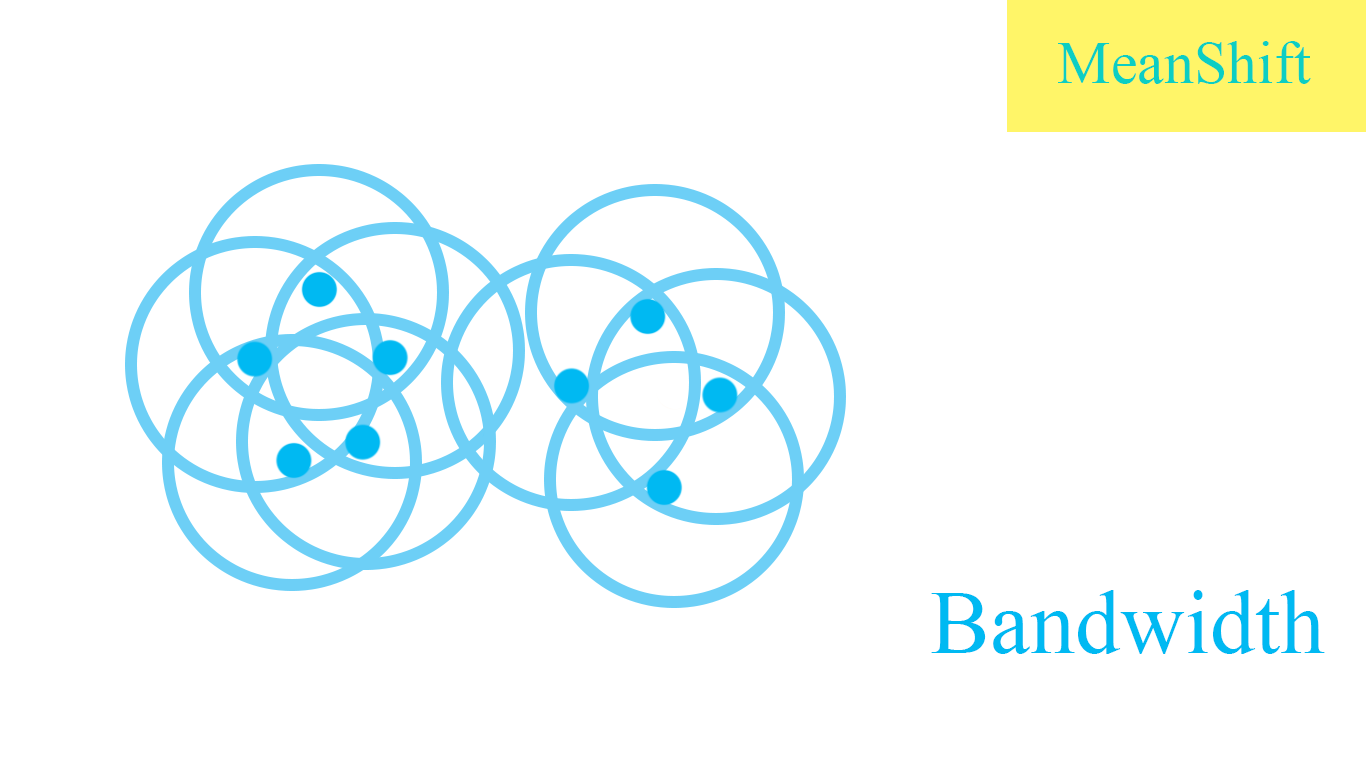

## 3- Compute the mean (center of mass) of all points inside that window and find the average position of all points inside that circle.

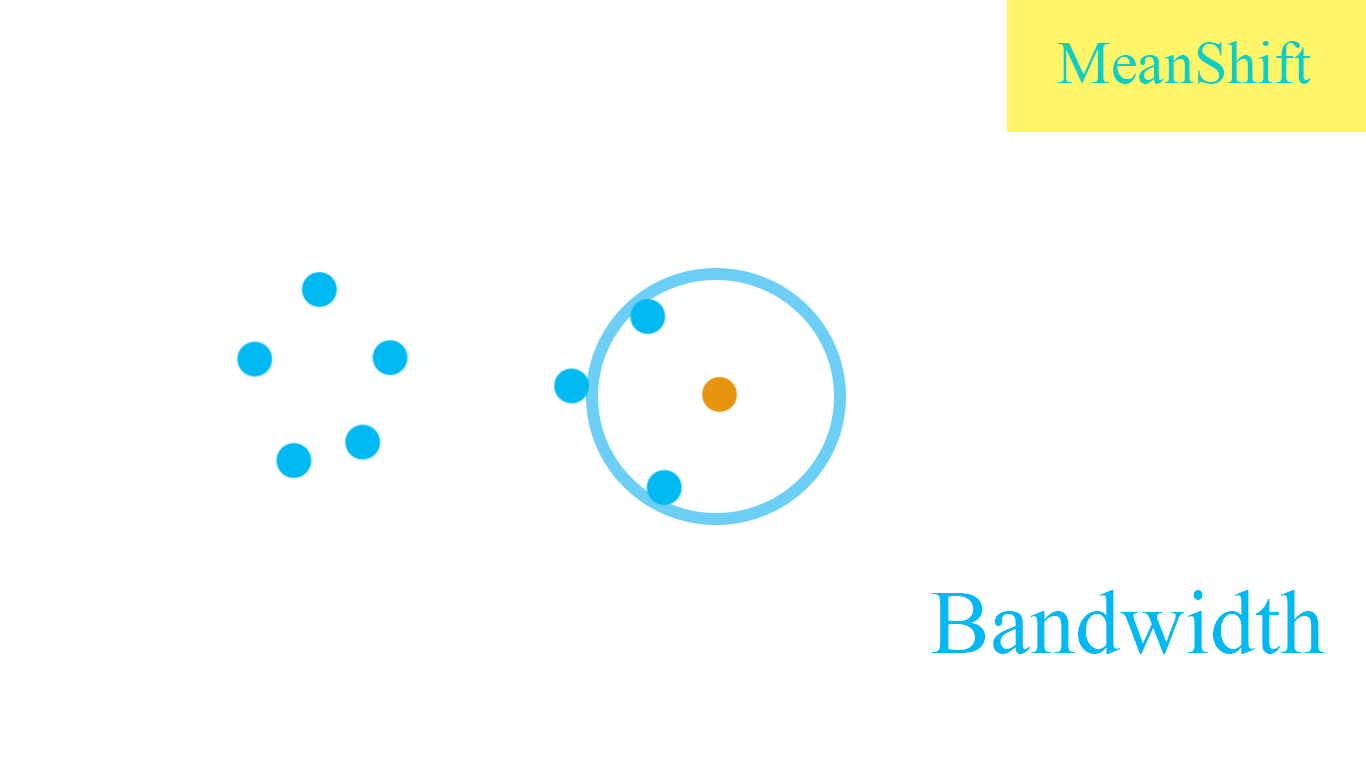

## 4- Move the circle to that average spot.

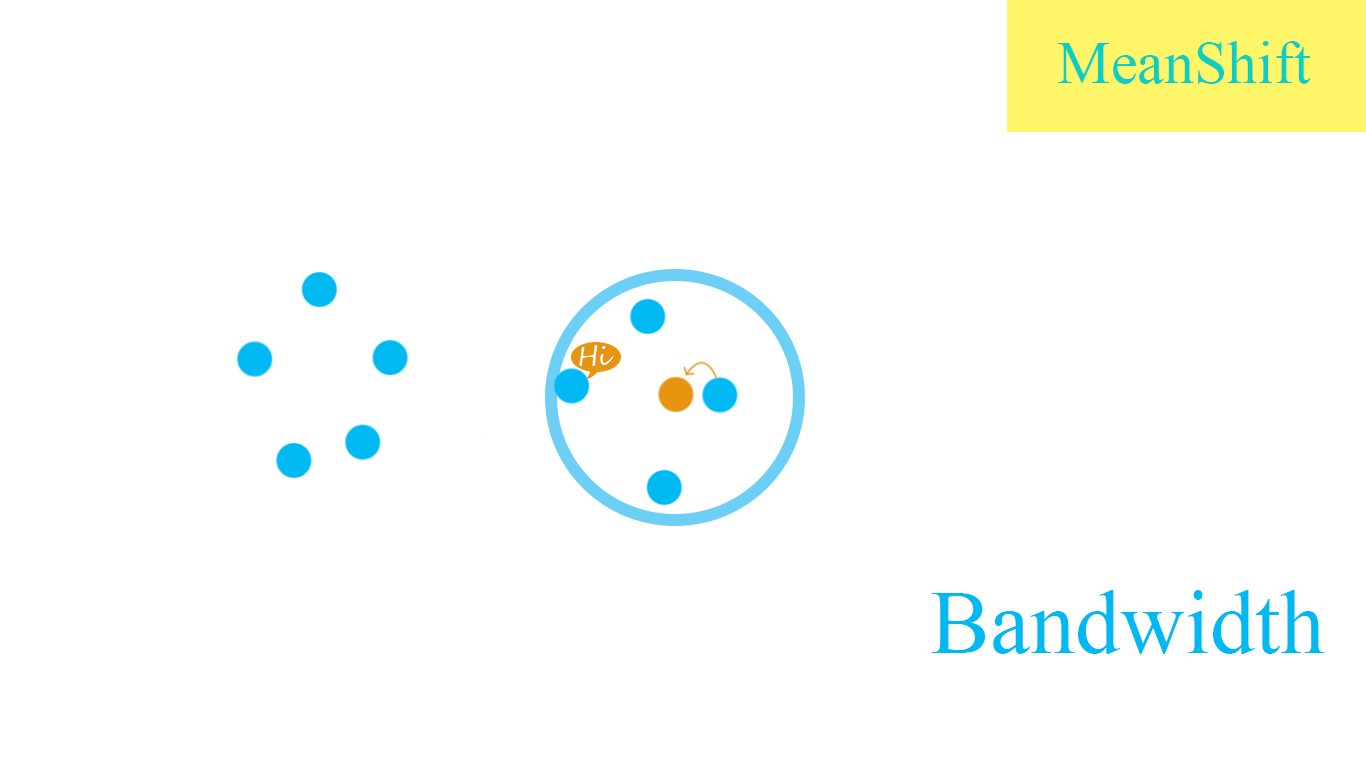

## 5- Repeat “compute mean → shift window” until convergence (the shift becomes very small), and Points whose windows converge to the same location are assigned to the same cluster.

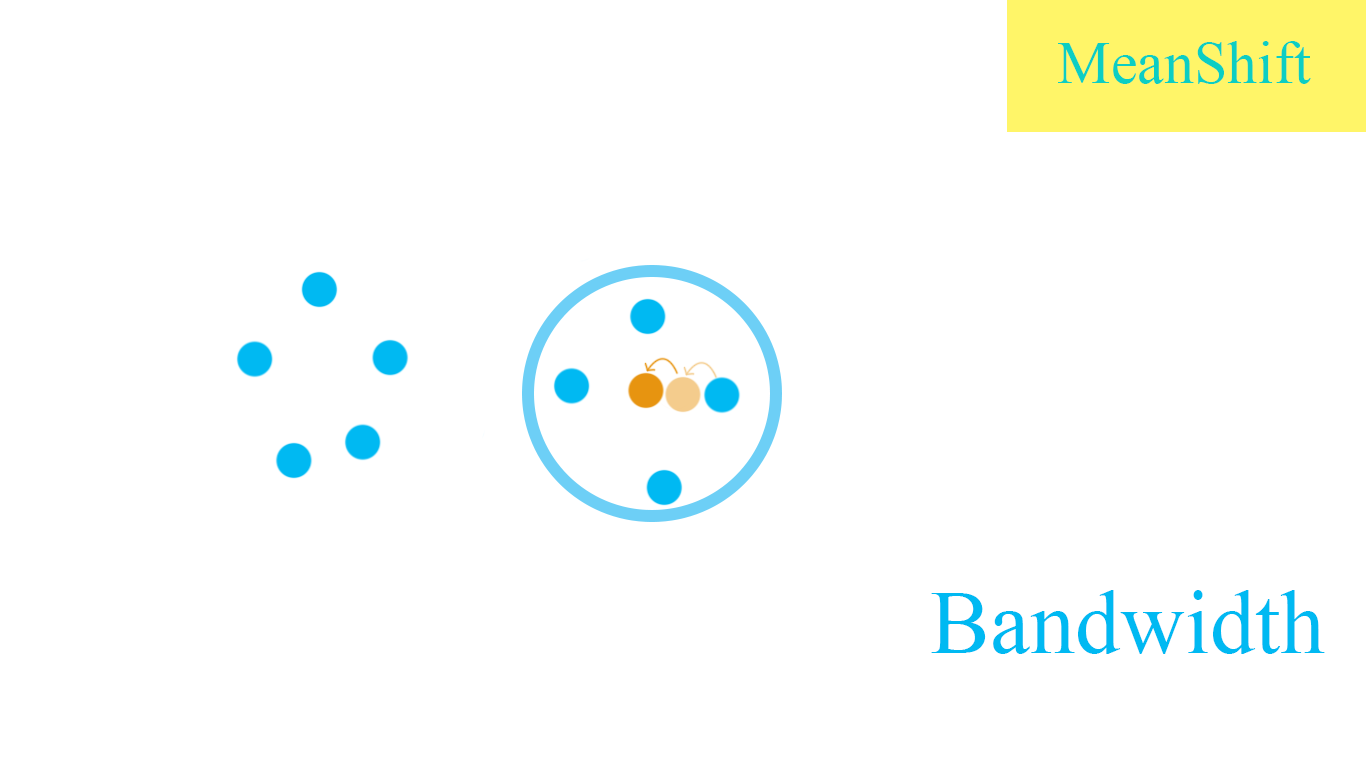

In [12]:
from sklearn.cluster import MeanShift

In [13]:
x = iris.data
ms = MeanShift()
ms.fit(x)

MeanShift()

In [14]:
labels = ms.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
n_cluster = len(np.unique(labels))
print('Number of estimated cluster:' ,n_cluster)

Number of estimated cluster: 2


In [16]:
cluster_center = ms.cluster_centers_
cluster_center

array([[6.21142857, 2.89285714, 4.85285714, 1.67285714],
       [5.01632653, 3.45102041, 1.46530612, 0.24489796]])

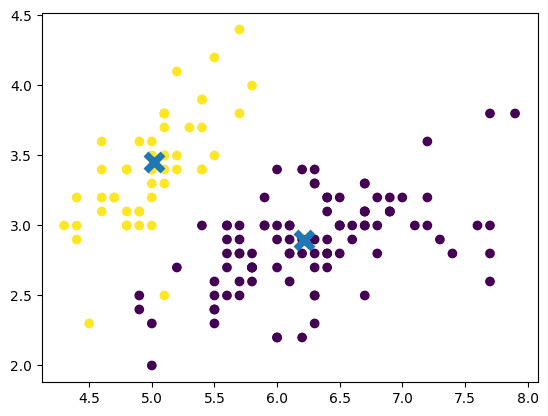

In [17]:
plt.scatter(x[:,0], x[:,1], c=labels) # plotting based on the Sepal length and width
plt.scatter(cluster_center[:,0], cluster_center[:,1], marker='x', s=150, linewidth=5, zorder=10)
plt.show()



---


# **3- DBSCAN Clustering**

## DBSCAN (**Density-Based Spatial Clustering of Applications with Noise**) is a method that finds clusters by looking for “thick” regions of points separated by “thin” regions.

###1-Automatically finds the number of clusters (no need to pre-set K).

###2-Discovers oddly shaped clusters (not just circles).

###3-Identifies noise — outliers are labeled explicitly.



---
#**Core Idea:**

## **Clusters = areas of high density**
### *Points that are packed tightly together form clusters.*

## **Noise = sparse points**
### *Points isolated from any dense region are labeled as “noise.”*



---

# **Two Key Parameters**

##1. **ε (eps):** how far you look around a point (neighborhood radius).

##2. **MinPts:** the minimum number of points that must lie within that ε-radius for the region to be considered “dense.”





---


# **3 Point Types**

##1. Core points

###*Have at least MinPts other points within distance ε.*

##2. Border points

###*Fewer than MinPts neighbors in ε, but lie within ε of some core point.*

##3. Noise points

###*Neither core nor border—stand-alone “outliers.”*

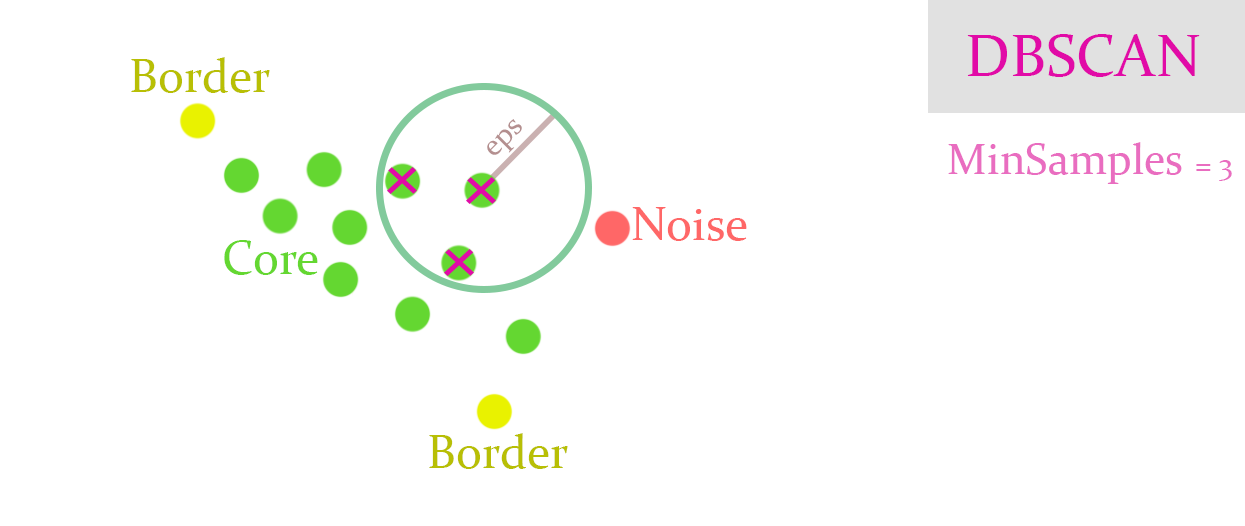

In [18]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler # important library for algorithms that use distances.
from sklearn.cluster import DBSCAN
from collections import Counter                  # counting how many times each cluster label appears
import matplotlib.pyplot as plt

In [19]:
iris = load_iris()
X = iris.data

In [20]:
scaler = StandardScaler()           # it’s going to learn each feature’s mean and standard deviation befor fitting the data
X_scaled = scaler.fit_transform(X)

In [21]:
db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(X_scaled)

In [22]:
print("Cluster labels for each sample:\n", labels)
print("\nUnique clusters found:", set(labels))
print("Points per cluster:", Counter(labels))

Cluster labels for each sample:
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1 -1 -1  1 -1 -1  1 -1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1
  1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1
  1  1  1  1 -1  1]

Unique clusters found: {np.int64(0), np.int64(1), np.int64(-1)}
Points per cluster: Counter({np.int64(1): 71, np.int64(0): 45, np.int64(-1): 34})


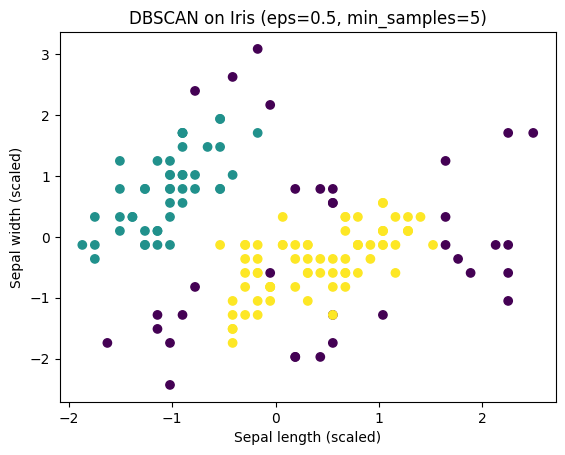

In [23]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels)
plt.xlabel('Sepal length (scaled)')
plt.ylabel('Sepal width (scaled)')
plt.title('DBSCAN on Iris (eps=0.5, min_samples=5)')
plt.show()



---

# **Dimension Reduction**

## An unsupervised learning refers to the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

## It is often used to simplify models, reduce computation time, and remove noise from data while retaining the essential structure and relationships.

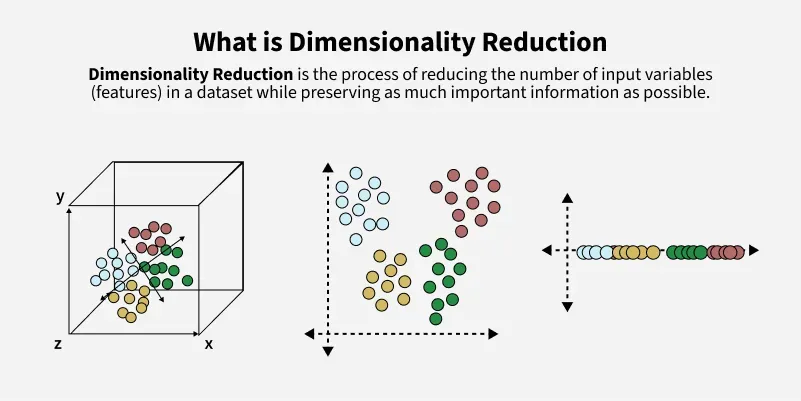



---


# **Key Technique**

## *Principal Component Analysis (PCA):*

### This method transforms the original variables into a new set of uncorrelated variables called principal components, which are ordered by the amount of variance they explain in the data that is allowing for a reduction in dimensions.



---

##The provided example using the Iris dataset, the original dataset has 4 features (or parameters):

### 1. Sepal length

### 2. Sepal width

### 3. Petal length

### 4. Petal width

### The goal is, these 4 features will be reduced to 2 principal components using Principal Component Analysis (PCA).

In [24]:
import matplotlib.pyplot as plt #visualization library in python
from sklearn.datasets import load_iris #library for classical machine learning
import sklearn.decomposition as sd #part of sklearn for dimention reduction, changing and transforming of dataa parameters

#load the Iris dataset
data = load_iris() #this code is not standard, standard codes are defined in pandas
X = data.data
y = data.target



---


### The fit_transform method of the PCA class computes the principal components and transforms the original 4-dimensional data into a new 2-dimensional space. These two new dimensions are linear combinations of the original four dimensions, chosen to maximize the variance captured from the original data.

In [25]:
# Apply PCA to reduce the dataset to 2 dimentions
pca = sd.PCA(n_components=2) #pca is the name of algorythm
X_reduced = pca.fit_transform(X) #Result: X_reduced is the transformed dataset with 2 features(principal components)

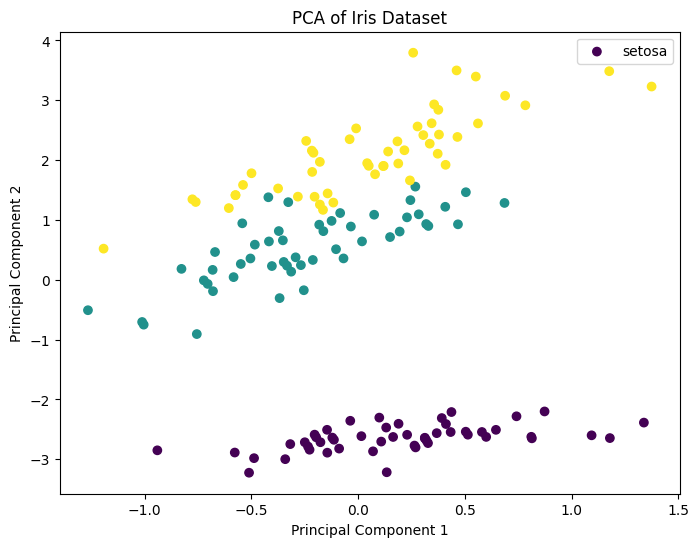

In [26]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_reduced[:, 1], X_reduced[:, 0], c=y, cmap='viridis') # Single datapoits are separated in First Principal components (PC1) and the Second Principal components (PC2).
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend( labels=data.target_names)
plt.show()
#the advantage of this code is the different data are separated clearly

In [27]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3



---


### - The output as `X_reduced` contains the coordinates of the original data points in the new 2-dimensional space defined by the first two principal components.

### - Each of these principal components is a weighted combination of the original four features.

### - This means that while we have reduced the dimensionality, the new components still retain as much variance as possible from the original features.

### - ***Variance*** is a statistical measure that quantifies the degree to which data points in a dataset differ from the mean of the dataset.

### PCA is merging the types of data which they have similar behaviors that are defined in ***Variance***

In [28]:
X_reduced #instead of 4 parameters, we have just 2 parameters, and this is more represetative

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [29]:
import pandas as pd

df = pd.DataFrame(X, columns=data.feature_names)

#add a column for the target variable
df['target'] = y

#add columns for the reduced data
df['PC1'] = X_reduced[:, 0]
df['PC2'] = X_reduced[:, 1]

#print the data frame
df

# we have many numbers in (-) sign, that means that these are only related to their correlation

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,PC1,PC2
0,5.1,3.5,1.4,0.2,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,-2.728717,0.326755
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1.944110,0.187532
146,6.3,2.5,5.0,1.9,2,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,2,1.764346,0.078859
148,6.2,3.4,5.4,2.3,2,1.900942,0.116628


In [30]:
# Apply PCA to reduce the dataset to 3 dimentions
pca = sd.PCA(n_components=3)
X_reduced = pca.fit_transform(X) #Result: X_reduced is the transformed dataset with only 2 features (principal components)
df = pd.DataFrame(X, columns=data.feature_names) #this code is applied for defining the data frame.

# Add a column for the target variable
df['target'] = y

# Add columns for reduced data
df['PC1'] = X_reduced[:, 0]
df['PC2'] = X_reduced[:, 1]
df['PC3'] = X_reduced[:, 2]

In [31]:
import plotly.express as px
fig = px.scatter_3d(df, x="PC1", y="PC2", z="PC3", color="target")
fig.show()



---

# **Explained Variance Ratio:**

## The explained variance ratio of the selected principal components is printed. This indicates the proportion of the dataset's variance that is captured by each principal component and tells us how much information (variance) can be.



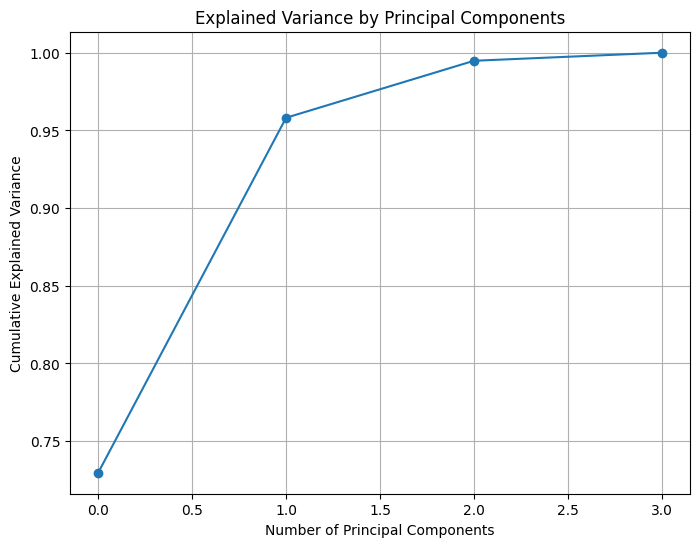

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# StandardScaler is a tool that standardizes data by transforming features to have a mean of zero and a standard deviation of one.



# Assuming X is your dataset
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA on the scaled data
pca_full = PCA().fit(X_scaled)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='-') #cumsum is cummulative percentage
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

# 100% variance explained = all the spread

## - When the chosen principal components together explain 1 (or 100%) of the variance, it means we have kept every bit of the data’s “wiggle room” or variation.

## - Finally, We can perfectly rebuild the data by recreation the original (mean-centered) dataset, and exactly—nothing is lost (aside from tiny rounding errors).

## - Even though using 3 principal components retains more variance, 2 components usually capture most of the important structure (e.g., 95%+ of the variance in the Iris dataset), which is good enough to reveal patterns.

| Reason                 | Use 2 PCs          | Use 3+ PCs             |
| ---------------------- | ------------------ | ---------------------- |
| Visualization          | ✅ Easy to plot     | ❌ Hard to visualize    |
| Enough information     | ✅ 95–99% variance  | ✅ 100% variance        |
| Simpler interpretation | ✅ Simple           | ❌ More complex         |
| ML model preprocessing | ✅ Often sufficient | ✅ If accuracy improves |


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_reduced)

KMeans(n_clusters=3, random_state=42)

In [ ]:
cluster_labels = kmeans.labels_
inertia = kmeans.inertia_
print("K-Means Inertia:", inertia)

K-Means Inertia: 75.32404895774174


In [ ]:
inertia_list = []

# make a list which we add the caluculation of inertial in each loop to this list
for k in np.arange(1,40): # the structure of loop should be consistent and the next lines should be after for .
    kmn =KMeans(n_clusters = k)
    kmn.fit(df)
    inertia_list.append(kmn.inertia_)
inertia_list

[1459.1897711469571,
 328.20387892848436,
 166.2135605291133,
 123.56904087291059,
 107.52435739658878,
 83.1293817553993,
 68.28586550261308,
 71.87209563734706,
 67.3899683826549,
 51.9863572934252,
 49.18085281102761,
 46.57674059906665,
 42.83018424910064,
 40.82324765116455,
 39.15844023508404,
 39.333243495004105,
 36.8021050953868,
 32.83846416360394,
 30.02565662730641,
 31.880780071851845,
 28.82563663449561,
 28.40142378793797,
 25.118790146229383,
 26.90555915473711,
 25.68288228247607,
 23.64471243249061,
 22.428299285953347,
 21.11419035700735,
 21.222729100019773,
 20.43836965851127,
 19.821388264064634,
 19.976082322333433,
 18.908864478712818,
 17.85361794987717,
 16.966406271622237,
 15.85527077129352,
 15.47023700492842,
 15.935172976418205,
 14.856995966767915]

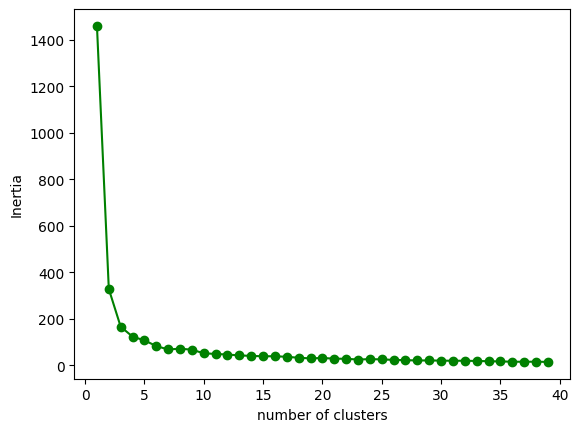

In [ ]:
plt.plot(np.arange(1,40),inertia_list,'o-',c='green')
plt.xlabel('number of clusters')
plt.ylabel('Inertia')
plt.show()

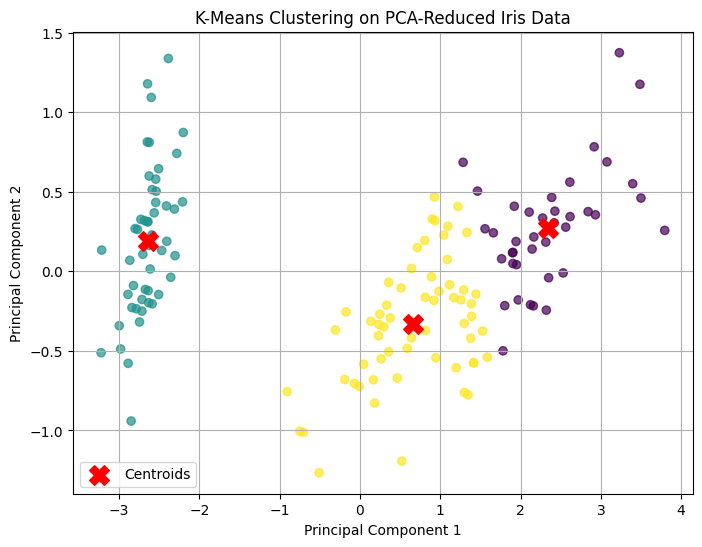

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering on PCA-Reduced Iris Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()